In [1]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
from scipy.stats import sem
from sklearn import metrics
import pandas as pd
target_names = ['non-patient', 'patient']

In [2]:
def CI(y_true, y_pred):
    n_bootstraps = 1000
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.randint(0, len(y_pred), len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue

        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
        #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
    print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))

In [3]:
fivefolds_label = pd.read_csv('../data/biclass2.txt', sep=' ')
fivefolds_label.rename(columns = {'file':'name'}, inplace = True)
fivefolds_label['name'] =  fivefolds_label['name'].str.replace('CTT', '').astype(int)
fivefolds_label['label'] =  fivefolds_label['label'].astype(bool).astype(str)
fivefolds_label['label'] =  fivefolds_label['label'].str.replace('False', 'Non-Dementia')
fivefolds_label['label'] =  fivefolds_label['label'].str.replace('True', 'Dementia')

## whisper

In [4]:
WhisperForAudioClassification_v2_15k = pd.read_csv('whisper-v2-15k-r-a-final-fix.csv')
# fivefolds_1k['result'] = np.where(fivefolds_1k['hyps'] >= 0.5,1,0)
WhisperForAudioClassification_v2_15k['name'] =  WhisperForAudioClassification_v2_15k['name'].str.split('\\').str.get(-1)
WhisperForAudioClassification_v2_15k['name'] =  WhisperForAudioClassification_v2_15k['name'].str.split('C').str.get(0).astype(int)
WhisperForAudioClassification_v2_15k = WhisperForAudioClassification_v2_15k.sort_values(by=['name'])
WhisperForAudioClassification_v2_15k = WhisperForAudioClassification_v2_15k.reset_index(drop=True)
WhisperForAudioClassification_v2_15k['label'] = fivefolds_label['label']
WhisperForAudioClassification_v2_15k.head(50)

,name,hyps,truth,ifcorrect,label
0,1,-0.227710,0.0,True,Non-Dementia
1,1,-0.227710,0.0,True,Non-Dementia
2,2,0.120742,0.0,True,Non-Dementia
3,2,0.120742,0.0,True,Dementia
4,3,-0.011286,0.0,True,Dementia
5,3,-0.011286,0.0,True,Non-Dementia
6,4,0.283720,0.5,True,Non-Dementia
7,4,0.283720,0.5,True,Non-Dementia
8,5,0.141981,0.5,False,Dementia
9,5,0.141981,0.5,False,Dementia


In [5]:
WhisperForAudioClassification_v2_15k.tail(36)

,name,hyps,truth,ifcorrect,label
136,83,0.186347,0.0,True,NaN
137,83,0.186347,0.0,True,NaN
138,84,-0.085167,0.0,True,NaN
139,84,-0.085167,0.0,True,NaN
140,85,0.338686,0.0,False,NaN
141,85,0.338686,0.0,False,NaN
142,86,0.064249,0.0,True,NaN
143,86,0.064249,0.0,True,NaN
144,87,0.041269,0.0,True,NaN
145,87,0.041269,0.0,True,NaN


In [6]:
WhisperForAudioClassification_v2_15k_result = WhisperForAudioClassification_v2_15k['ifcorrect'].tolist()
WhisperForAudioClassification_v2_15k_hyps = WhisperForAudioClassification_v2_15k['hyps'].tolist()
# fivefolds_1_truth = [int(i) for i in fivefolds_1k['truth'].tolist()]
bert_v2_15k_truth = WhisperForAudioClassification_v2_15k['truth'].tolist()

In [7]:
bert_v2_15k_label = WhisperForAudioClassification_v2_15k['label'].tolist()
bert_v2_15k_hyps = [float(i) for i in WhisperForAudioClassification_v2_15k['hyps'].tolist()]
WhisperForAudioClassification_v2_15k_truth = [float(i) for i in WhisperForAudioClassification_v2_15k['truth'].tolist()]
WhisperForAudioClassification_v2_15k_name = [str(i).replace("CTT", "") for i in WhisperForAudioClassification_v2_15k['name'].tolist()]

In [8]:
# print(classification_report(fivefolds_1_truth, fivefolds_1_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_1_truth, fivefolds_1_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_1_truth), np.array(fivefolds_1_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

print('evs: ', metrics.explained_variance_score(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('mae: ', metrics.mean_absolute_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('mse: ', metrics.mean_squared_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)))
print('r2: ', metrics.r2_score(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
total_mae = metrics.mean_absolute_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)

evs:  0.24364554022715057
mae:  0.19202069137624445
mse:  0.07944077418865772
rmse:  0.2818523978763667
r2:  0.24285571404727768


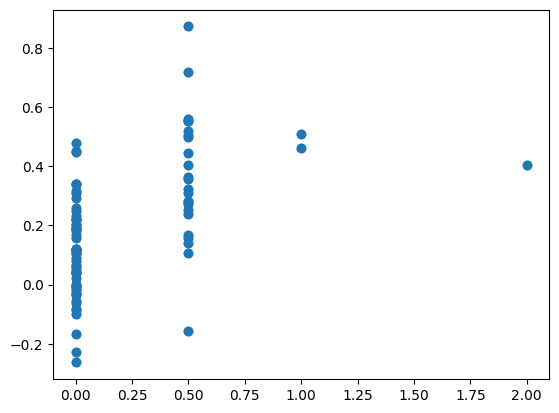

In [9]:
import matplotlib.pyplot as plt
plt.scatter(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)
# plt.plot(list(range(len(fivefolds_1_truth))), fivefolds_1_hyps)
plt.show()

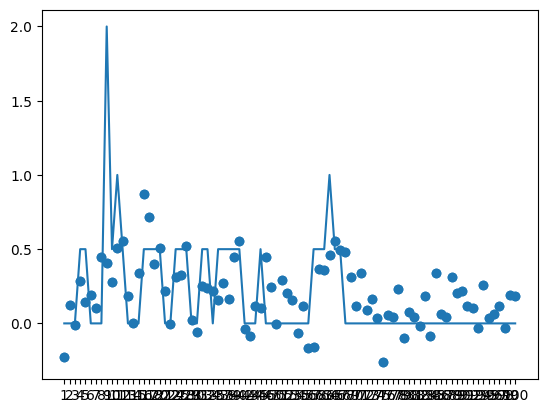

In [10]:
import matplotlib.pyplot as plt
plt.scatter(WhisperForAudioClassification_v2_15k_name, WhisperForAudioClassification_v2_15k_hyps)
plt.plot(WhisperForAudioClassification_v2_15k_name, WhisperForAudioClassification_v2_15k_truth)
plt.show()

<Axes: >

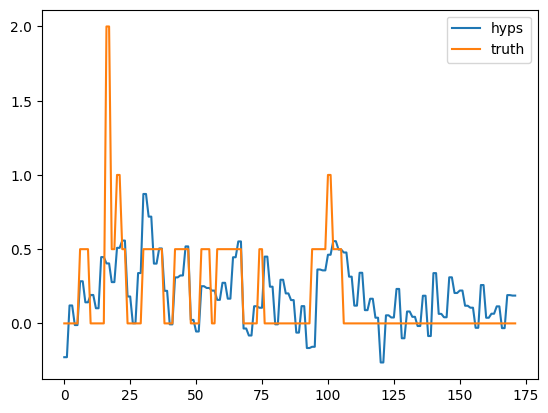

In [11]:
WhisperForAudioClassification_v2_15k_noname = WhisperForAudioClassification_v2_15k
WhisperForAudioClassification_v2_15k_noname = WhisperForAudioClassification_v2_15k_noname.drop(['name'], axis=1)
WhisperForAudioClassification_v2_15k_noname.plot()

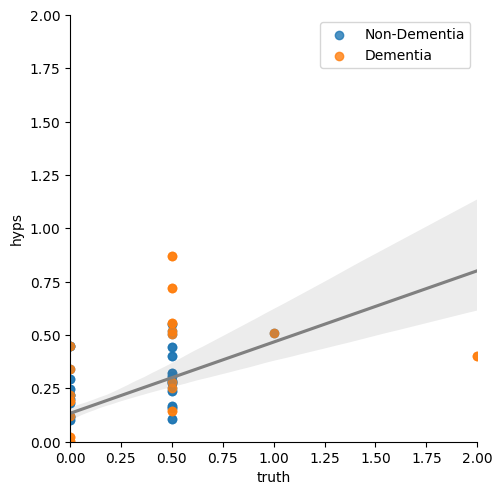

In [12]:
import seaborn as sns
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(WhisperForAudioClassification_v2_15k['truth'],WhisperForAudioClassification_v2_15k['hyps'])

# Use lmplot to plot scatter points
sns.lmplot(x='truth', y='hyps', hue='label', data=WhisperForAudioClassification_v2_15k, fit_reg=False, legend=False)

# Use regplot to plot the regression line and use line_kws to set line label for legend
# ax = sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, scatter_kws={"zorder":-1},
# line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), "color": "green"})
ax = sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})

# plot legend
ax.legend()
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)

# save the plot as PNG file
plt.savefig("CDR_v2.png")
plt.savefig("CDR_v2.jpg")

<Axes: xlabel='truth', ylabel='hyps'>

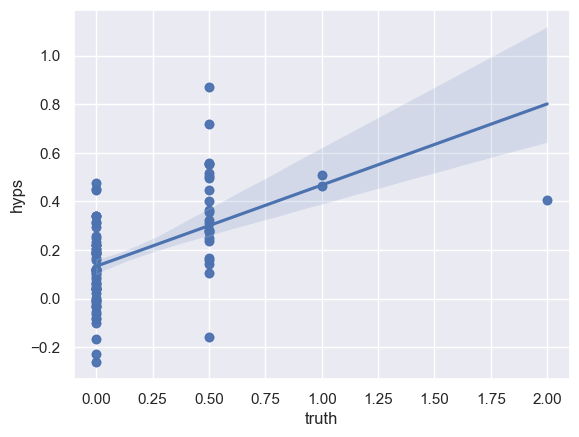

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k)

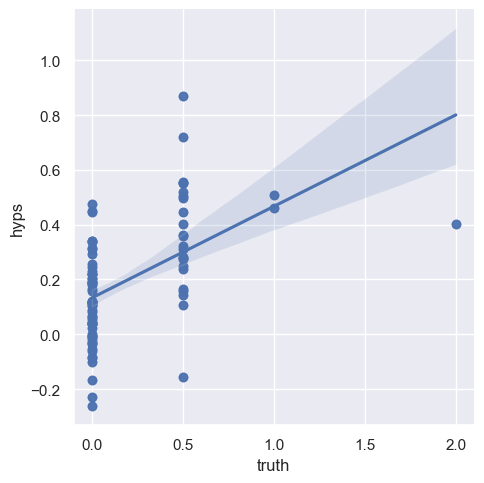

In [14]:
sns.lmplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k)

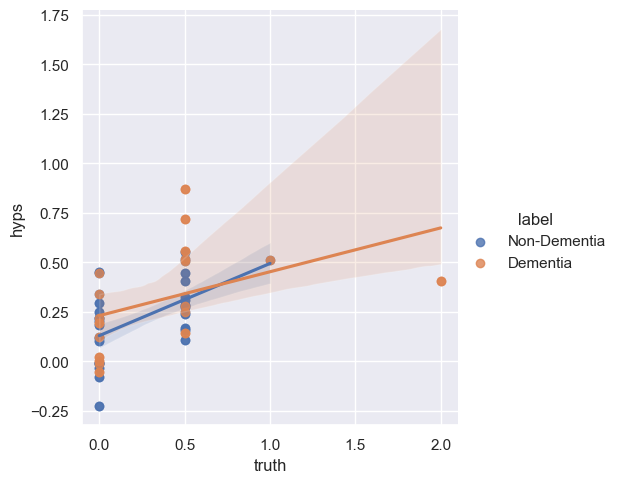

In [15]:
sns.lmplot(x="truth", y="hyps", hue="label", data=WhisperForAudioClassification_v2_15k)

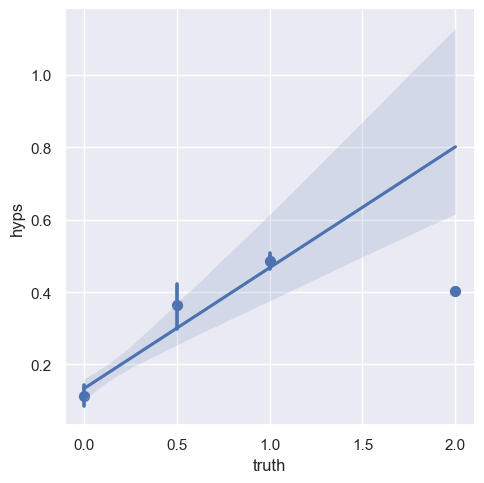

In [16]:
sns.lmplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, x_estimator=np.mean);

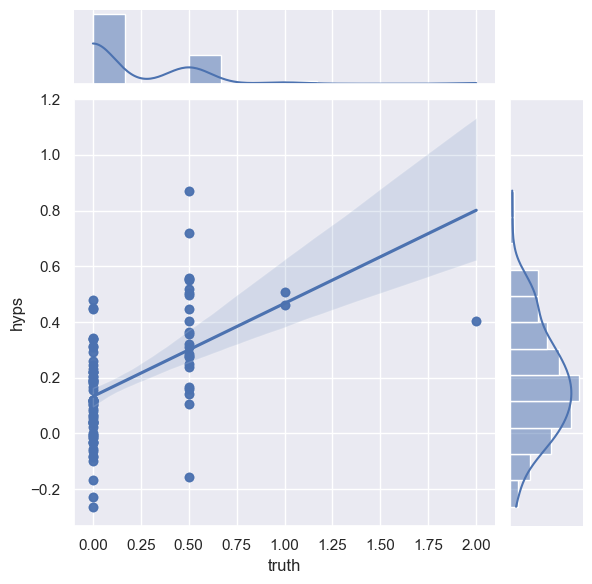

In [17]:
sns.jointplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, kind="reg")

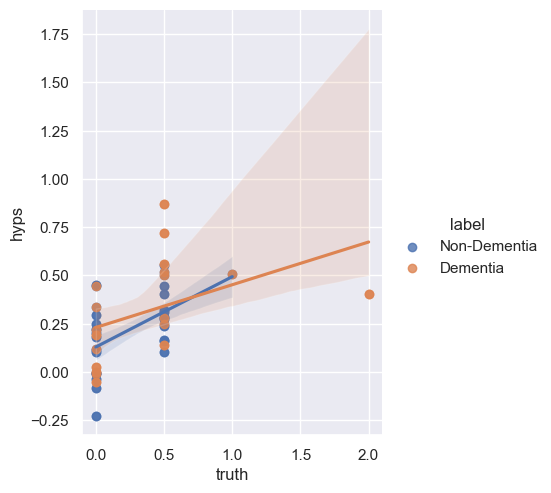

In [18]:
sns.pairplot(WhisperForAudioClassification_v2_15k, x_vars="truth", y_vars="hyps", hue="label", height=5, aspect=.8, kind="reg")

In [19]:
# decision_tree_result = pd.DataFrame()
train_mae = []
test_mae = []

fivefolds1_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k1.csv')
fivefolds1_hyps = fivefolds1_steps['hyps'].tolist()
fivefolds1_truth = [int(i) for i in fivefolds1_steps['truth'].tolist()]
fivefolds1_name = [str(i).replace("CTT", "") for i in fivefolds1_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds1_truth, fivefolds1_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps)))
print('r2: ', metrics.r2_score(fivefolds1_truth, fivefolds1_hyps))
test_mae1 = metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps)
test_mae.append(test_mae1)
train_mae1 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds1_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds1_name))
train_mae.append(train_mae1)

fivefolds2_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k2.csv')
fivefolds2_hyps = fivefolds2_steps['hyps'].tolist()
fivefolds2_truth = [int(i) for i in fivefolds2_steps['truth'].tolist()]
fivefolds2_name = [str(i).replace("CTT", "") for i in fivefolds2_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds2_truth, fivefolds2_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps)))
print('r2: ', metrics.r2_score(fivefolds2_truth, fivefolds2_hyps))
test_mae2 = metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps)
test_mae.append(test_mae2)
train_mae2 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds2_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds2_name))
train_mae.append(train_mae2)

fivefolds3_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k3.csv')
fivefolds3_hyps = fivefolds3_steps['hyps'].tolist()
fivefolds3_truth = [int(i) for i in fivefolds3_steps['truth'].tolist()]
fivefolds3_name = [str(i).replace("CTT", "") for i in fivefolds3_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds3_truth, fivefolds3_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps)))
print('r2: ', metrics.r2_score(fivefolds3_truth, fivefolds3_hyps))
test_mae3 = metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps)
test_mae.append(test_mae3)
train_mae3 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds3_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds3_name))
train_mae.append(train_mae3)

fivefolds4_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k4.csv')
fivefolds4_hyps = fivefolds4_steps['hyps'].tolist()
fivefolds4_truth = [int(i) for i in fivefolds4_steps['truth'].tolist()]
fivefolds4_name = [str(i).replace("CTT", "") for i in fivefolds4_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds4_truth, fivefolds4_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps)))
print('r2: ', metrics.r2_score(fivefolds4_truth, fivefolds4_hyps))
test_mae4 = metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps)
test_mae.append(test_mae4)
train_mae4 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds4_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds4_name))
train_mae.append(train_mae4)

fivefolds5_steps = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k5.csv')
fivefolds5_hyps = fivefolds5_steps['hyps'].tolist()
fivefolds5_truth = [int(i) for i in fivefolds5_steps['truth'].tolist()]
fivefolds5_name = [str(i).replace("CTT", "") for i in fivefolds5_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds5_truth, fivefolds5_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps)))
print('r2: ', metrics.r2_score(fivefolds5_truth, fivefolds5_hyps))
test_mae5 = metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps)
test_mae.append(test_mae5)
train_mae5 = (total_mae*len(WhisperForAudioClassification_v2_15k_name) - test_mae1*len(fivefolds5_name)) / (len(WhisperForAudioClassification_v2_15k_name) - len(fivefolds5_name))
train_mae.append(train_mae5)

array = np.stack((train_mae, test_mae), axis=1)
decision_tree_result = pd.DataFrame(array,  columns = ['train_mae', 'test_mae'])
# decision_tree_result = pd.DataFrame(test_mae,  columns = ['test_mae'])
decision_tree_result

evs:  -0.2718370078124366
mae:  0.26177797780225154
mse:  0.10596267964468582
rmse:  0.3255190925962498
r2:  -1.1251404084295324
evs:  -0.05425135235055767
mae:  0.18392529294619128
mse:  0.06605030320854126
rmse:  0.2570025354126711
r2:  -0.25884107291572733
evs:  0.0
mae:  0.13448824949206456
mse:  0.035283520932005145
rmse:  0.18783908254675102
r2:  0.0
evs:  0.00675186176693654
mae:  0.30979426424292955
mse:  0.23146050131261836
rmse:  0.48110342059958205
r2:  -0.04518882623979237
evs:  0.29015283247658175
mae:  0.19784228635184906
mse:  0.062255222894232916
rmse:  0.2495099655208844
r2:  -0.12448496352708194


,train_mae,test_mae
0,0.183358,0.261778
1,0.183867,0.183925
2,0.184370,0.134488
3,0.184370,0.309794
4,0.184370,0.197842


In [20]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.0, 0.3)
        plt.bar(X_axis-0.2, train_data, 0.4, color='steelblue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='lightsteelblue', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

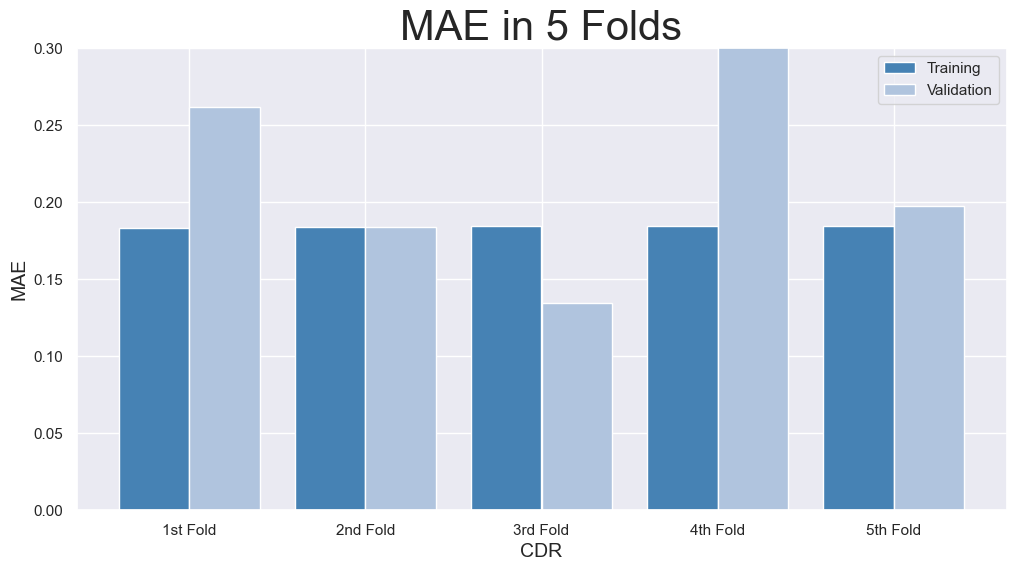

In [21]:
model_name = "CDR"
plot_result(model_name,
            "MAE",
            "MAE in 5 Folds",
            decision_tree_result["train_mae"],
            decision_tree_result["test_mae"])

## BERT

In [4]:
bert_v2_15k = pd.read_csv('bert-v2-15k-r-final-2.csv')
# fivefolds_1k['result'] = np.where(fivefolds_1k['hyps'] >= 0.5,1,0)
# bert_v2_15k['name'] =  bert_v2_15k['name'].str.split('\\').str.get(-1)
# bert_v2_15k['name'] =  bert_v2_15k['name'].str.split('C').str.get(0).astype(int)
bert_v2_15k['name'] =  bert_v2_15k['name'].astype(int)
bert_v2_15k = bert_v2_15k.sort_values(by=['name'])
bert_v2_15k = bert_v2_15k.reset_index(drop=True)
bert_v2_15k['label'] = fivefolds_label['label']
bert_v2_15k.head(50)

,name,hyps,truth,ifcorrect,label
0,1,0.089930,0.0,True,Non-Dementia
1,2,-0.124370,0.0,True,Non-Dementia
2,3,0.128762,0.0,True,Non-Dementia
3,4,0.660650,0.5,False,Dementia
4,5,0.583475,0.5,False,Dementia
5,6,0.086374,0.0,True,Non-Dementia
6,7,0.169083,0.0,True,Non-Dementia
7,8,0.188852,0.0,True,Non-Dementia
8,9,0.475689,2.0,False,Dementia
9,10,0.873015,0.5,False,Dementia


In [5]:
bert_v2_15k.tail(36)

,name,hyps,truth,ifcorrect,label
50,64,0.403973,1.0,False,Dementia
51,65,0.343502,0.5,True,Dementia
52,67,0.257074,0.5,True,Dementia
53,68,0.475555,0.0,False,Non-Dementia
54,69,0.202935,0.0,True,Non-Dementia
55,70,-0.219196,0.0,True,Non-Dementia
56,71,0.120724,0.0,True,Non-Dementia
57,72,0.104798,0.0,True,Non-Dementia
58,73,0.025323,0.0,True,Non-Dementia
59,74,0.025770,0.0,True,Non-Dementia


In [6]:
bert_v2_15k_result = bert_v2_15k['ifcorrect'].tolist()
bert_v2_15k_hyps = bert_v2_15k['hyps'].tolist()
# fivefolds_1_truth = [int(i) for i in fivefolds_1k['truth'].tolist()]
bert_v2_15k_truth = bert_v2_15k['truth'].tolist()

In [7]:
bert_v2_15k_label = bert_v2_15k['label'].tolist()
bert_v2_15k_hyps = [float(i) for i in bert_v2_15k['hyps'].tolist()]
bert_v2_15k_truth = [float(i) for i in bert_v2_15k['truth'].tolist()]
bert_v2_15k_name = [str(i).replace("CTT", "") for i in bert_v2_15k['name'].tolist()]

In [8]:
# print(classification_report(fivefolds_1_truth, fivefolds_1_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_1_truth, fivefolds_1_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_1_truth), np.array(fivefolds_1_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

print('evs: ', metrics.explained_variance_score(bert_v2_15k_truth, bert_v2_15k_hyps))
print('mae: ', metrics.mean_absolute_error(bert_v2_15k_truth, bert_v2_15k_hyps))
print('mse: ', metrics.mean_squared_error(bert_v2_15k_truth, bert_v2_15k_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(bert_v2_15k_truth, bert_v2_15k_hyps)))
print('r2: ', metrics.r2_score(bert_v2_15k_truth, bert_v2_15k_hyps))
total_mae = metrics.mean_absolute_error(bert_v2_15k_truth, bert_v2_15k_hyps)

evs:  -0.09581325719116118
mae:  0.23558710363888463
mse:  0.11524424268295949
rmse:  0.3394764243404238
r2:  -0.09838456041645438


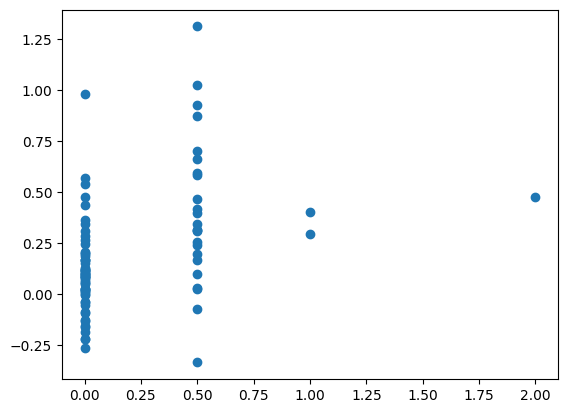

In [9]:
import matplotlib.pyplot as plt
plt.scatter(bert_v2_15k_truth, bert_v2_15k_hyps)
# plt.plot(list(range(len(fivefolds_1_truth))), fivefolds_1_hyps)
plt.show()

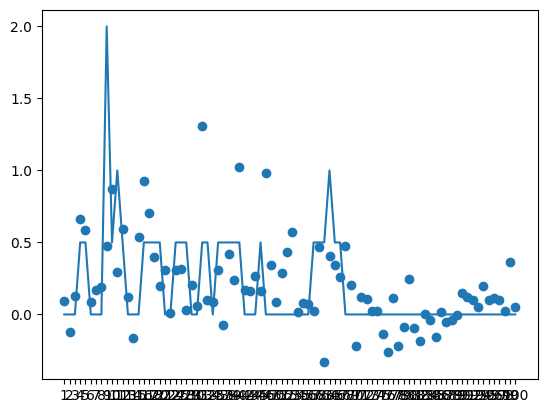

In [10]:
import matplotlib.pyplot as plt
plt.scatter(bert_v2_15k_name, bert_v2_15k_hyps)
plt.plot(bert_v2_15k_name, bert_v2_15k_truth)
plt.show()

<Axes: >

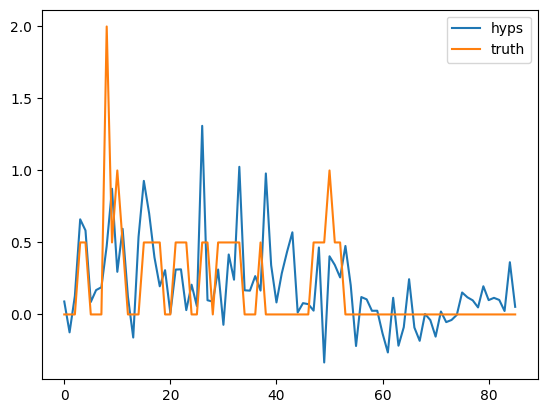

In [11]:
bert_v2_15k_noname = bert_v2_15k
bert_v2_15k_noname = bert_v2_15k_noname.drop(['name'], axis=1)
bert_v2_15k_noname.plot()

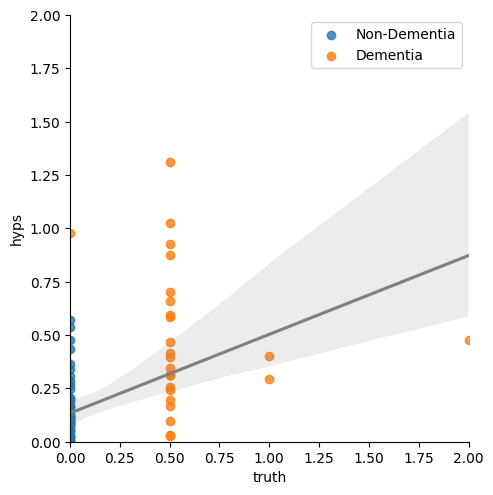

In [12]:
import seaborn as sns
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(bert_v2_15k['truth'],bert_v2_15k['hyps'])

# Use lmplot to plot scatter points
sns.lmplot(x='truth', y='hyps', hue='label', data=bert_v2_15k, fit_reg=False, legend=False)

# Use regplot to plot the regression line and use line_kws to set line label for legend
# ax = sns.regplot(x="truth", y="hyps", data=bert_v2_15k, scatter_kws={"zorder":-1},
# line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), "color": "green"})
ax = sns.regplot(x="truth", y="hyps", data=bert_v2_15k, scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})

# plot legend
ax.legend()
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)

# save the plot as PNG file
plt.savefig("CDR_v2_bert.png")
plt.savefig("CDR_v2_bert.jpg")

<Axes: xlabel='truth', ylabel='hyps'>

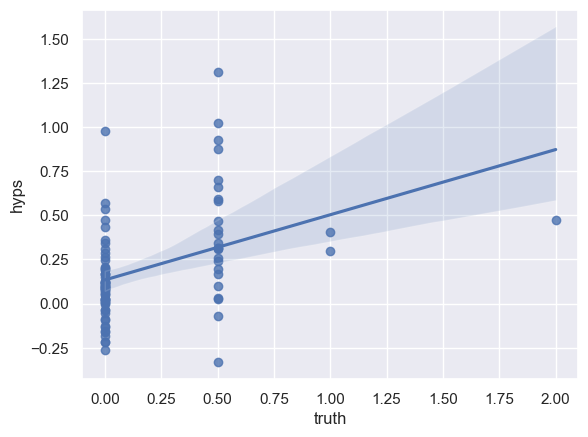

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
sns.regplot(x="truth", y="hyps", data=bert_v2_15k)

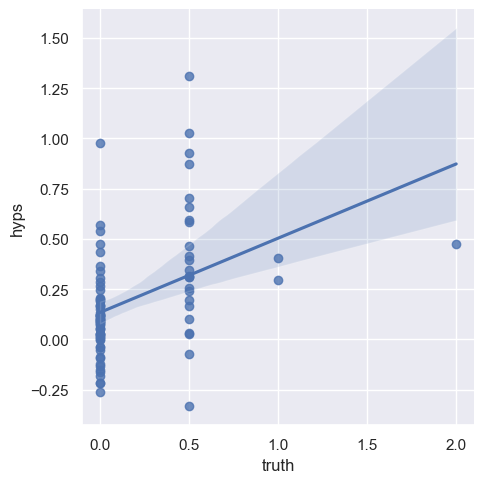

In [14]:
sns.lmplot(x="truth", y="hyps", data=bert_v2_15k)

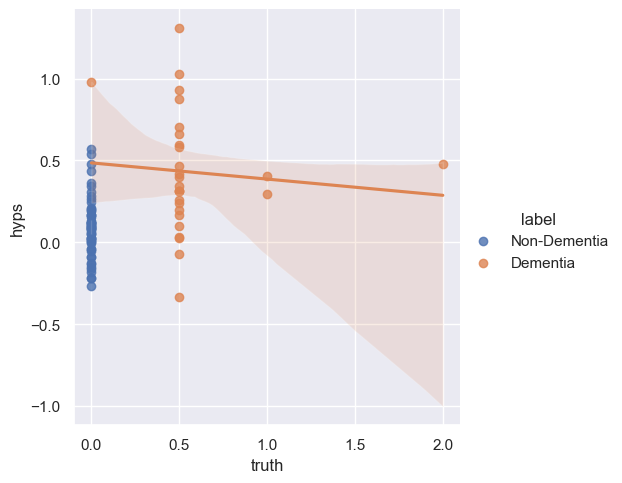

In [15]:
sns.lmplot(x="truth", y="hyps", hue="label", data=bert_v2_15k)

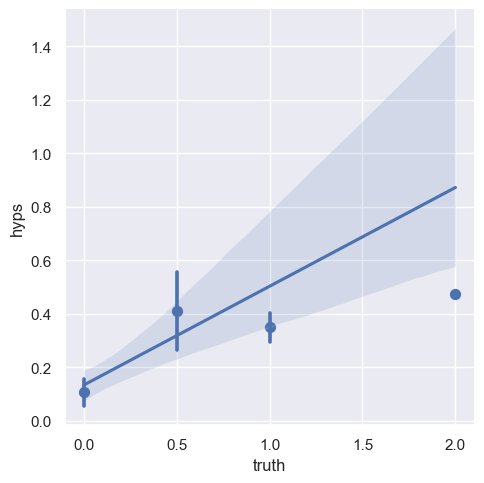

In [16]:
sns.lmplot(x="truth", y="hyps", data=bert_v2_15k, x_estimator=np.mean);

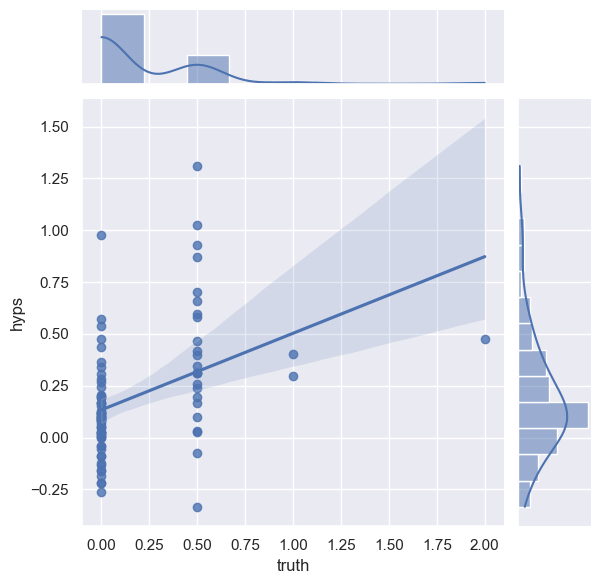

In [17]:
sns.jointplot(x="truth", y="hyps", data=bert_v2_15k, kind="reg")

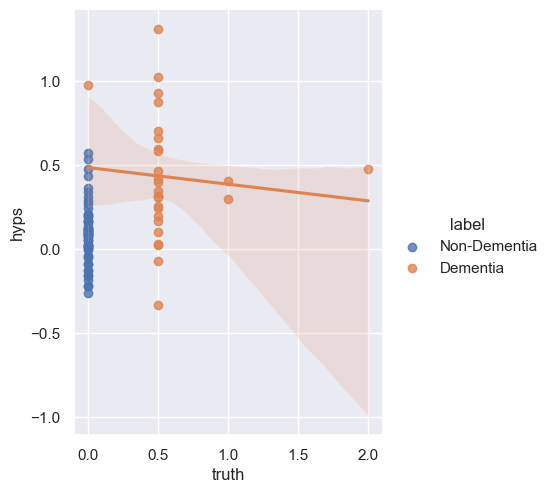

In [18]:
sns.pairplot(bert_v2_15k, x_vars="truth", y_vars="hyps", hue="label", height=5, aspect=.8, kind="reg")

In [19]:
# decision_tree_result = pd.DataFrame()
train_mae = []
test_mae = []

fivefolds1_steps = pd.read_csv('bert-v2-15k1.csv')
fivefolds1_hyps = fivefolds1_steps['hyps'].tolist()
fivefolds1_truth = [int(i) for i in fivefolds1_steps['truth'].tolist()]
fivefolds1_name = [str(i).replace("CTT", "") for i in fivefolds1_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds1_truth, fivefolds1_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds1_truth, fivefolds1_hyps)))
print('r2: ', metrics.r2_score(fivefolds1_truth, fivefolds1_hyps))
test_mae1 = metrics.mean_absolute_error(fivefolds1_truth, fivefolds1_hyps)
test_mae.append(test_mae1)
train_mae1 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds1_name)) / (len(bert_v2_15k_name) - len(fivefolds1_name))
train_mae.append(train_mae1)

fivefolds2_steps = pd.read_csv('bert-v2-15k2.csv')
fivefolds2_hyps = fivefolds2_steps['hyps'].tolist()
fivefolds2_truth = [int(i) for i in fivefolds2_steps['truth'].tolist()]
fivefolds2_name = [str(i).replace("CTT", "") for i in fivefolds2_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds2_truth, fivefolds2_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds2_truth, fivefolds2_hyps)))
print('r2: ', metrics.r2_score(fivefolds2_truth, fivefolds2_hyps))
test_mae2 = metrics.mean_absolute_error(fivefolds2_truth, fivefolds2_hyps)
test_mae.append(test_mae2)
train_mae2 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds2_name)) / (len(bert_v2_15k_name) - len(fivefolds2_name))
train_mae.append(train_mae2)

fivefolds3_steps = pd.read_csv('bert-v2-15k3.csv')
fivefolds3_hyps = fivefolds3_steps['hyps'].tolist()
fivefolds3_truth = [int(i) for i in fivefolds3_steps['truth'].tolist()]
fivefolds3_name = [str(i).replace("CTT", "") for i in fivefolds3_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds3_truth, fivefolds3_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds3_truth, fivefolds3_hyps)))
print('r2: ', metrics.r2_score(fivefolds3_truth, fivefolds3_hyps))
test_mae3 = metrics.mean_absolute_error(fivefolds3_truth, fivefolds3_hyps)
test_mae.append(test_mae3)
train_mae3 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds3_name)) / (len(bert_v2_15k_name) - len(fivefolds3_name))
train_mae.append(train_mae3)

fivefolds4_steps = pd.read_csv('bert-v2-15k4.csv')
fivefolds4_hyps = fivefolds4_steps['hyps'].tolist()
fivefolds4_truth = [int(i) for i in fivefolds4_steps['truth'].tolist()]
fivefolds4_name = [str(i).replace("CTT", "") for i in fivefolds4_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds4_truth, fivefolds4_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds4_truth, fivefolds4_hyps)))
print('r2: ', metrics.r2_score(fivefolds4_truth, fivefolds4_hyps))
test_mae4 = metrics.mean_absolute_error(fivefolds4_truth, fivefolds4_hyps)
test_mae.append(test_mae4)
train_mae4 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds4_name)) / (len(bert_v2_15k_name) - len(fivefolds4_name))
train_mae.append(train_mae4)

fivefolds5_steps = pd.read_csv('bert-v2-15k5.csv')
fivefolds5_hyps = fivefolds5_steps['hyps'].tolist()
fivefolds5_truth = [int(i) for i in fivefolds5_steps['truth'].tolist()]
fivefolds5_name = [str(i).replace("CTT", "") for i in fivefolds5_steps['name'].tolist()]
print('evs: ', metrics.explained_variance_score(fivefolds5_truth, fivefolds5_hyps))
print('mae: ', metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps))
print('mse: ', metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(fivefolds5_truth, fivefolds5_hyps)))
print('r2: ', metrics.r2_score(fivefolds5_truth, fivefolds5_hyps))
test_mae5 = metrics.mean_absolute_error(fivefolds5_truth, fivefolds5_hyps)
test_mae.append(test_mae5)
train_mae5 = (total_mae*len(bert_v2_15k_name) - test_mae1*len(fivefolds5_name)) / (len(bert_v2_15k_name) - len(fivefolds5_name))
train_mae.append(train_mae5)

array = np.stack((train_mae, test_mae), axis=1)
decision_tree_result = pd.DataFrame(array,  columns = ['train_mae', 'test_mae'])
# decision_tree_result = pd.DataFrame(test_mae,  columns = ['test_mae'])
decision_tree_result

evs:  -1.5959441143441815
mae:  0.3119453091272398
mse:  0.16767753740628258
rmse:  0.40948447761335544
r2:  -2.3628661668704454
evs:  -0.43295021027010305
mae:  0.360300126278566
mse:  0.19740600585029228
rmse:  0.44430395659986227
r2:  -2.7623262291467463
evs:  0.0
mae:  0.18634928861523375
mse:  0.05983780314350942
rmse:  0.2446176672759133
r2:  0.0
evs:  0.11481582964844661
mae:  0.2400565107407815
mse:  0.19603161503191419
rmse:  0.4427545765228341
r2:  0.11479473837151244
evs:  -0.11205915492516239
mae:  0.18704814203631348
mse:  0.061821727104002216
rmse:  0.2486397536678361
r2:  -0.11665494581603997


,train_mae,test_mae
0,0.213933,0.311945
1,0.215375,0.360300
2,0.216774,0.186349
3,0.216774,0.240057
4,0.216774,0.187048


In [20]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.0, 0.3)
        plt.bar(X_axis-0.2, train_data, 0.4, color='steelblue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='lightsteelblue', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

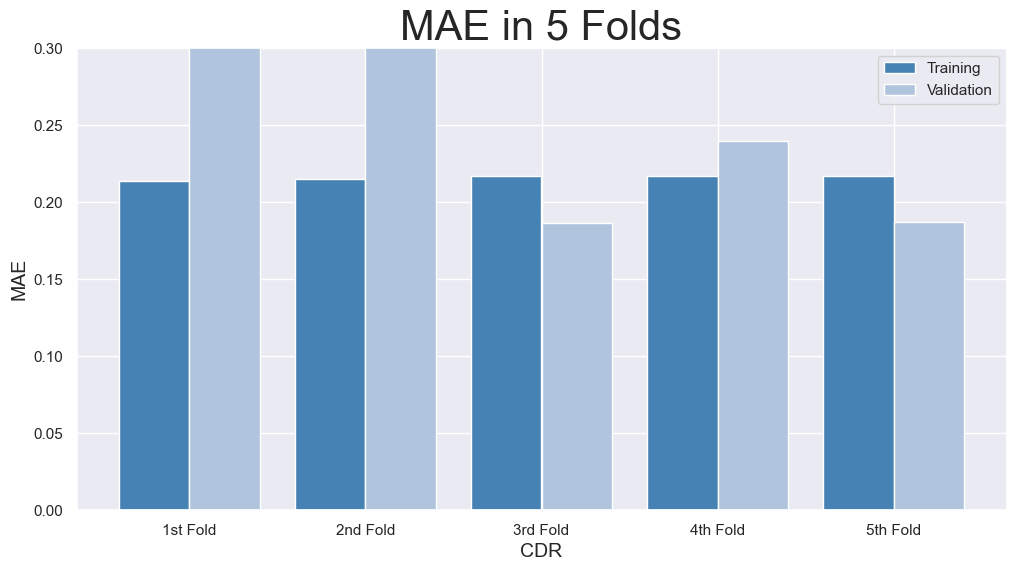

In [21]:
model_name = "CDR"
plot_result(model_name,
            "MAE",
            "MAE in 5 Folds",
            decision_tree_result["train_mae"],
            decision_tree_result["test_mae"])

## Combine

In [5]:
whisper_v2_15k = pd.read_csv('whisper-v2-15k-r-a-final-fix.csv')
bert_v2_15k = pd.read_csv('bert-v2-15k-r-final-2.csv')
# fivefolds_1k['result'] = np.where(fivefolds_1k['hyps'] >= 0.5,1,0)
# bert_v2_15k['name'] =  bert_v2_15k['name'].str.split('\\').str.get(-1)
# bert_v2_15k['name'] =  bert_v2_15k['name'].str.split('C').str.get(0).astype(int)
combine_v2_15k = pd.DataFrame()
bert_v2_15k['name'] =  bert_v2_15k['name'].astype(int)
bert_v2_15k = bert_v2_15k.sort_values(by=['name'])
bert_v2_15k = bert_v2_15k.reset_index(drop=True)
whisper_v2_15k['name'] =  whisper_v2_15k['name'].str.split('\\').str.get(-1)
whisper_v2_15k['name'] =  whisper_v2_15k['name'].str.split('C').str.get(0).astype(int)
whisper_v2_15k = whisper_v2_15k.sort_values(by=['name'])
whisper_v2_15k = whisper_v2_15k.reset_index(drop=True)
print(bert_v2_15k)
print(whisper_v2_15k)
combine_v2_15k['name'] = bert_v2_15k['name']
combine_v2_15k['hyps'] =  (bert_v2_15k['hyps']+whisper_v2_15k['hyps'])/2
combine_v2_15k['truth'] = bert_v2_15k['truth']
combine_v2_15k['ifcorrect'] = bert_v2_15k['ifcorrect']
combine_v2_15k['label'] = fivefolds_label['label']
combine_v2_15k.to_csv("combine_v2_15k.csv")
combine_v2_15k.head(50)

    name      hyps  truth  ifcorrect
0      1  0.089930    0.0       True
1      2 -0.124370    0.0       True
2      3  0.128762    0.0       True
3      4  0.660650    0.5      False
4      5  0.583475    0.5      False
..   ...       ...    ...        ...
81    96  0.115318    0.0       True
82    97  0.100615    0.0       True
83    98  0.023928    0.0       True
84    99  0.362685    0.0      False
85   100  0.052872    0.0       True

[86 rows x 4 columns]
     name      hyps  truth  ifcorrect
0       1 -0.227710    0.0       True
1       1 -0.227710    0.0       True
2       2  0.120742    0.0       True
3       2  0.120742    0.0       True
4       3 -0.011286    0.0       True
..    ...       ...    ...        ...
167    98 -0.031982    0.0       True
168    99  0.190502    0.0       True
169    99  0.190502    0.0       True
170   100  0.187268    0.0       True
171   100  0.187268    0.0       True

[172 rows x 4 columns]


,name,hyps,truth,ifcorrect,label
0,1,-0.068890,0.0,True,Non-Dementia
1,2,-0.176040,0.0,True,Non-Dementia
2,3,0.124752,0.0,True,Non-Dementia
3,4,0.390696,0.5,False,Dementia
4,5,0.286095,0.5,False,Dementia
5,6,0.037544,0.0,True,Non-Dementia
6,7,0.226402,0.0,True,Non-Dementia
7,8,0.236286,0.0,True,Non-Dementia
8,9,0.308835,2.0,False,Dementia
9,10,0.507498,0.5,False,Dementia


# data augmentation

## whisper

In [4]:
WhisperForAudioClassification_v2_15k = pd.read_csv('whisper-v2-15k-r-final-fix.csv')
# fivefolds_1k['result'] = np.where(fivefolds_1k['hyps'] >= 0.5,1,0)
WhisperForAudioClassification_v2_15k['name'] =  WhisperForAudioClassification_v2_15k['name'].str.split('\\').str.get(-1)
WhisperForAudioClassification_v2_15k['name'] =  WhisperForAudioClassification_v2_15k['name'].str.split('C').str.get(0).astype(int)
WhisperForAudioClassification_v2_15k = WhisperForAudioClassification_v2_15k.sort_values(by=['name'])
WhisperForAudioClassification_v2_15k = WhisperForAudioClassification_v2_15k.reset_index(drop=True)
WhisperForAudioClassification_v2_15k['label'] = fivefolds_label['label']
WhisperForAudioClassification_v2_15k.head(50)

,name,hyps,truth,ifcorrect,label
0,1,-0.074119,0.0,True,Non-Dementia
1,2,0.185348,0.0,True,Non-Dementia
2,3,0.046134,0.0,True,Non-Dementia
3,4,0.064814,0.5,False,Dementia
4,5,0.148891,0.5,False,Dementia
5,6,0.203633,0.0,True,Non-Dementia
6,7,0.158357,0.0,True,Non-Dementia
7,8,0.365183,0.0,False,Non-Dementia
8,9,0.245599,2.0,False,Dementia
9,10,0.259434,0.5,True,Dementia


In [5]:
WhisperForAudioClassification_v2_15k.tail(36)

,name,hyps,truth,ifcorrect,label
50,64,0.343131,1.0,False,Dementia
51,65,0.158742,0.5,False,Dementia
52,67,0.441938,0.5,True,Dementia
53,68,0.119653,0.0,True,Non-Dementia
54,69,0.233909,0.0,True,Non-Dementia
55,70,-0.018761,0.0,True,Non-Dementia
56,71,0.235198,0.0,True,Non-Dementia
57,72,0.120220,0.0,True,Non-Dementia
58,73,-0.101802,0.0,True,Non-Dementia
59,74,0.057532,0.0,True,Non-Dementia


In [6]:
WhisperForAudioClassification_v2_15k_result = WhisperForAudioClassification_v2_15k['ifcorrect'].tolist()
WhisperForAudioClassification_v2_15k_hyps = WhisperForAudioClassification_v2_15k['hyps'].tolist()
# fivefolds_1_truth = [int(i) for i in fivefolds_1k['truth'].tolist()]
bert_v2_15k_truth = WhisperForAudioClassification_v2_15k['truth'].tolist()

In [7]:
bert_v2_15k_label = WhisperForAudioClassification_v2_15k['label'].tolist()
bert_v2_15k_hyps = [float(i) for i in WhisperForAudioClassification_v2_15k['hyps'].tolist()]
WhisperForAudioClassification_v2_15k_truth = [float(i) for i in WhisperForAudioClassification_v2_15k['truth'].tolist()]
WhisperForAudioClassification_v2_15k_name = [str(i).replace("CTT", "") for i in WhisperForAudioClassification_v2_15k['name'].tolist()]

In [8]:
# print(classification_report(fivefolds_1_truth, fivefolds_1_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_1_truth, fivefolds_1_result).ravel()
# print('sensitivuty: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_1_truth), np.array(fivefolds_1_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

print('evs: ', metrics.explained_variance_score(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('mae: ', metrics.mean_absolute_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('mse: ', metrics.mean_squared_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
print('rmse: ', np.sqrt(metrics.mean_squared_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)))
print('r2: ', metrics.r2_score(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps))
total_mae = metrics.mean_absolute_error(WhisperForAudioClassification_v2_15k_truth, WhisperForAudioClassification_v2_15k_hyps)

evs:  0.009516596831827484
mae:  0.23647623171293458
mse:  0.10398795068799842
rmse:  0.32247162772560073
r2:  0.008898346277788183


(0.0, 2.0)

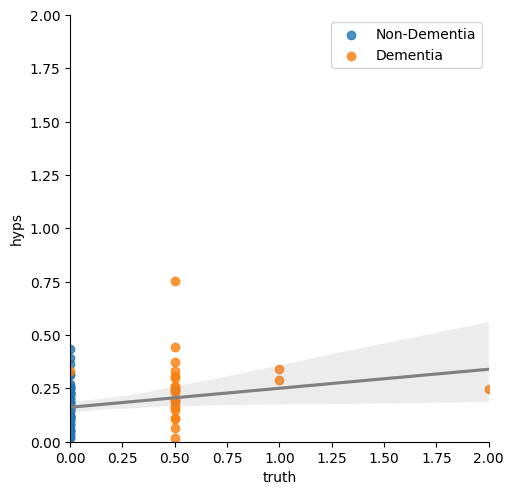

In [9]:
import seaborn as sns
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(WhisperForAudioClassification_v2_15k['truth'],WhisperForAudioClassification_v2_15k['hyps'])

# Use lmplot to plot scatter points
sns.lmplot(x='truth', y='hyps', hue='label', data=WhisperForAudioClassification_v2_15k, fit_reg=False, legend=False)

# Use regplot to plot the regression line and use line_kws to set line label for legend
# ax = sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, scatter_kws={"zorder":-1},
# line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), "color": "green"})
ax = sns.regplot(x="truth", y="hyps", data=WhisperForAudioClassification_v2_15k, scatter_kws={"zorder":-1, "color": "white"}, line_kws={"color": "gray"})

# plot legend
ax.legend()
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)

# save the plot as PNG file
# plt.savefig("CDR_v2.png")
# plt.savefig("CDR_v2.jpg")